In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/PhishTank/Base_classifier_result(pre HTML cross).csv")
data

,labels,dt_prediction_non,dt_prediction_phish,knn_prediction_non,knn_prediction_phish,XGB_prediction_non,XGB_prediction_phish
0,0,0.965658,0.034342,1.000000,0.000000,0.988965,0.011035
1,1,0.005313,0.994687,0.000000,1.000000,0.012205,0.987795
2,0,0.965658,0.034342,1.000000,0.000000,0.916181,0.083819
3,0,0.965658,0.034342,1.000000,0.000000,0.929763,0.070237
4,0,0.821229,0.178771,1.000000,0.000000,0.848500,0.151500
...,...,...,...,...,...,...,...
4647,0,0.965658,0.034342,1.000000,0.000000,0.984831,0.015169
4648,1,0.056225,0.943775,0.000000,1.000000,0.040416,0.959584
4649,0,0.965658,0.034342,1.000000,0.000000,0.984831,0.015169
4650,0,0.960674,0.039326,1.000000,0.000000,0.957848,0.042152


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4652 entries, 0 to 4651
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   labels                4652 non-null   int64  
 1   dt_prediction_non     4652 non-null   float64
 2   dt_prediction_phish   4652 non-null   float64
 3   knn_prediction_non    4652 non-null   float64
 4   knn_prediction_phish  4652 non-null   float64
 5   XGB_prediction_non    4652 non-null   float64
 6   XGB_prediction_phish  4652 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 254.5 KB


In [6]:
import numpy as np


y = data['labels'].values
x = np.array(data.drop('labels',axis=1))


print(x.shape, y.shape)

(4652, 6) (4652,)


In [7]:

import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


def model_aa(x_train, x_val, y_train, y_val, opt, early_stopping_monitor):

  n_cols = x_train.shape[1]
  # print("check point")
  #create model
  model = Sequential()
  model.add(Dense(30, activation='relu', input_shape=(n_cols,)))
  model.add(Dense(10, activation='relu'))

  model.add(Dense(1, activation = 'sigmoid'))
  # softmax
  #compile model using mse as a measure of model performance
  model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=["accuracy"])

  history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()


  print('Validation Accuracy: ')
  # Predicting the Test set results
  y_pred = model.predict(x_val)
  y_pred = (y_pred > 0.5)


  print(classification_report(y_val, y_pred))

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

  # Creating the Confusion Matrix
  cm = confusion_matrix(y_val, y_pred)
  print(cm)
  print('Precision: %.4f' % precision_score(y_val, y_pred))
  print('Recall: %.4f' % recall_score(y_val, y_pred))
  print('F1 Score: %.4f' % f1_score(y_val, y_pred))
  return metrics.accuracy_score(y_val, y_pred)



Epoch 1/100
131/131 [==============================] - 1s 4ms/step - loss: 0.5911 - accuracy: 0.6775 - val_loss: 0.4382 - val_accuracy: 0.9356
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.9319 - val_loss: 0.2679 - val_accuracy: 0.9506
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.9381 - val_loss: 0.1722 - val_accuracy: 0.9485
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1783 - accuracy: 0.9424 - val_loss: 0.1379 - val_accuracy: 0.9506
Epoch 5/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9458 - val_loss: 0.1230 - val_accuracy: 0.9592
Epoch 6/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1538 - accuracy: 0.9458 - val_loss: 0.1168 - val_accuracy: 0.9592
Epoch 7/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1504 - accuracy: 0.9467 - val_loss: 0.1132 - val_accuracy: 0.9592

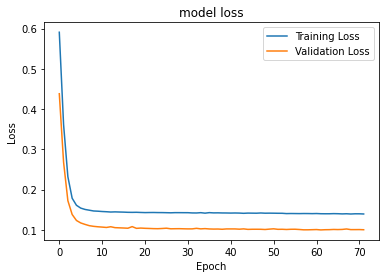

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       264
           1       0.96      0.96      0.96       202

    accuracy                           0.96       466
   macro avg       0.96      0.96      0.96       466
weighted avg       0.96      0.96      0.96       466

Accuracy: 0.9635193133047211
[[255   9]
 [  8 194]]
Precision: 0.9557
Recall: 0.9604
F1 Score: 0.9580
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2372 - accuracy: 0.9345 - val_loss: 0.1499 - val_accuracy: 0.9335
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1471 - accuracy: 0.9465 - val_loss: 0.1445 - val_accuracy: 0.9399
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1441 - accuracy: 0.9477 - val_loss: 0.1434 - val_accuracy: 0.9442
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1427 - accuracy: 0.9498 - val_loss: 0.1404 

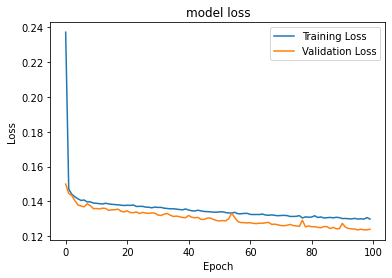

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       261
           1       0.97      0.93      0.95       205

    accuracy                           0.95       466
   macro avg       0.96      0.95      0.95       466
weighted avg       0.96      0.95      0.95       466

Accuracy: 0.9549356223175965
[[255   6]
 [ 15 190]]
Precision: 0.9694
Recall: 0.9268
F1 Score: 0.9476
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2377 - accuracy: 0.9307 - val_loss: 0.1253 - val_accuracy: 0.9527
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1520 - accuracy: 0.9451 - val_loss: 0.1168 - val_accuracy: 0.9656
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1483 - accuracy: 0.9460 - val_loss: 0.1150 - val_accuracy: 0.9634
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1471 - accuracy: 0.9453 - val_loss: 0.1112 

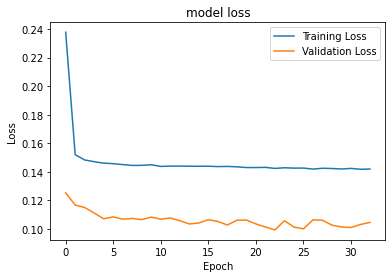

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       268
           1       0.99      0.93      0.96       197

    accuracy                           0.97       465
   macro avg       0.97      0.97      0.97       465
weighted avg       0.97      0.97      0.97       465

Accuracy: 0.9698924731182795
[[267   1]
 [ 13 184]]
Precision: 0.9946
Recall: 0.9340
F1 Score: 0.9634
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2822 - accuracy: 0.8916 - val_loss: 0.1585 - val_accuracy: 0.9441
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1459 - accuracy: 0.9460 - val_loss: 0.1517 - val_accuracy: 0.9441
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9463 - val_loss: 0.1487 - val_accuracy: 0.9484
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1402 - accuracy: 0.9479 - val_loss: 0.1475 

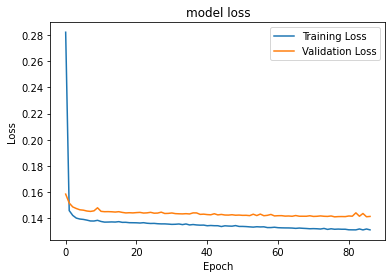

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       268
           1       0.95      0.93      0.94       197

    accuracy                           0.95       465
   macro avg       0.95      0.95      0.95       465
weighted avg       0.95      0.95      0.95       465

Accuracy: 0.9505376344086022
[[258  10]
 [ 13 184]]
Precision: 0.9485
Recall: 0.9340
F1 Score: 0.9412
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.3931 - accuracy: 0.8586 - val_loss: 0.2643 - val_accuracy: 0.9548
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.9439 - val_loss: 0.1491 - val_accuracy: 0.9527
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1547 - accuracy: 0.9446 - val_loss: 0.1393 - val_accuracy: 0.9548
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1481 - accuracy: 0.9465 - val_loss: 0.1381 

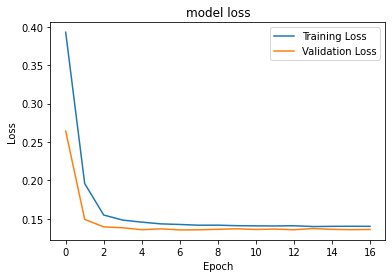

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       258
           1       0.96      0.95      0.96       207

    accuracy                           0.96       465
   macro avg       0.96      0.96      0.96       465
weighted avg       0.96      0.96      0.96       465

Accuracy: 0.9612903225806452
[[250   8]
 [ 10 197]]
Precision: 0.9610
Recall: 0.9517
F1 Score: 0.9563
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2439 - accuracy: 0.9417 - val_loss: 0.1750 - val_accuracy: 0.9312
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1471 - accuracy: 0.9455 - val_loss: 0.1643 - val_accuracy: 0.9419
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1433 - accuracy: 0.9487 - val_loss: 0.1602 - val_accuracy: 0.9441
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1396 - accuracy: 0.9487 - val_loss: 0.1597 

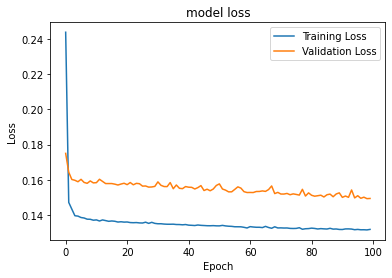

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       261
           1       0.95      0.93      0.94       204

    accuracy                           0.95       465
   macro avg       0.95      0.94      0.95       465
weighted avg       0.95      0.95      0.95       465

Accuracy: 0.946236559139785
[[250  11]
 [ 14 190]]
Precision: 0.9453
Recall: 0.9314
F1 Score: 0.9383
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2632 - accuracy: 0.9300 - val_loss: 0.1912 - val_accuracy: 0.9355
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1461 - accuracy: 0.9436 - val_loss: 0.1848 - val_accuracy: 0.9398
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1413 - accuracy: 0.9458 - val_loss: 0.1832 - val_accuracy: 0.9376
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1388 - accuracy: 0.9487 - val_loss: 0.1825 -

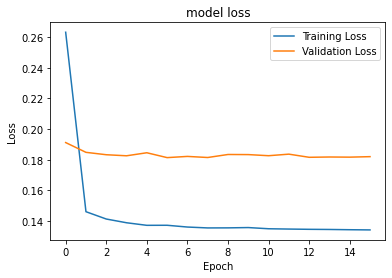

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       283
           1       0.92      0.92      0.92       182

    accuracy                           0.94       465
   macro avg       0.93      0.94      0.93       465
weighted avg       0.94      0.94      0.94       465

Accuracy: 0.9376344086021505
[[268  15]
 [ 14 168]]
Precision: 0.9180
Recall: 0.9231
F1 Score: 0.9205
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2591 - accuracy: 0.9126 - val_loss: 0.1510 - val_accuracy: 0.9441
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1502 - accuracy: 0.9451 - val_loss: 0.1416 - val_accuracy: 0.9441
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1465 - accuracy: 0.9477 - val_loss: 0.1387 - val_accuracy: 0.9419
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1445 - accuracy: 0.9479 - val_loss: 0.1385 

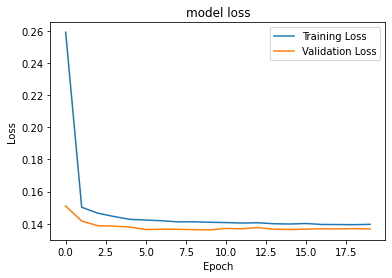

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       271
           1       0.96      0.92      0.94       194

    accuracy                           0.95       465
   macro avg       0.95      0.95      0.95       465
weighted avg       0.95      0.95      0.95       465

Accuracy: 0.9505376344086022
[[263   8]
 [ 15 179]]
Precision: 0.9572
Recall: 0.9227
F1 Score: 0.9396
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2927 - accuracy: 0.9092 - val_loss: 0.1501 - val_accuracy: 0.9484
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1547 - accuracy: 0.9441 - val_loss: 0.1455 - val_accuracy: 0.9441
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1478 - accuracy: 0.9458 - val_loss: 0.1370 - val_accuracy: 0.9462
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1452 - accuracy: 0.9470 - val_loss: 0.1373 

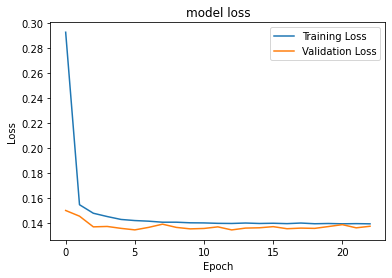

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       272
           1       0.94      0.93      0.93       193

    accuracy                           0.94       465
   macro avg       0.94      0.94      0.94       465
weighted avg       0.94      0.94      0.94       465

Accuracy: 0.9440860215053763
[[260  12]
 [ 14 179]]
Precision: 0.9372
Recall: 0.9275
F1 Score: 0.9323
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2902 - accuracy: 0.9040 - val_loss: 0.1762 - val_accuracy: 0.9355
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1540 - accuracy: 0.9427 - val_loss: 0.1674 - val_accuracy: 0.9376
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1472 - accuracy: 0.9467 - val_loss: 0.1645 - val_accuracy: 0.9355
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1440 - accuracy: 0.9470 - val_loss: 0.1622 

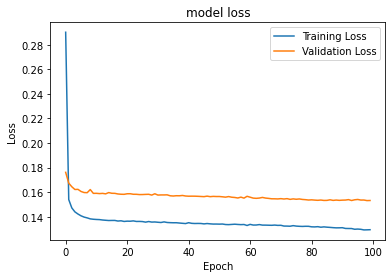

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       258
           1       0.94      0.92      0.93       207

    accuracy                           0.94       465
   macro avg       0.94      0.94      0.94       465
weighted avg       0.94      0.94      0.94       465

Accuracy: 0.9376344086021505
[[246  12]
 [ 17 190]]
Precision: 0.9406
Recall: 0.9179
F1 Score: 0.9291
Average Validation Accuracy: 0.9516304397987907


In [8]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x, y):
  val_acc = model_aa(x[train], x[val], y[train], y[val], optimizer1, early_stopping_monitor)
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)

